# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('previsao_de_renda.csv')
df['data_ref'] = pd.to_datetime(df['data_ref'])
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

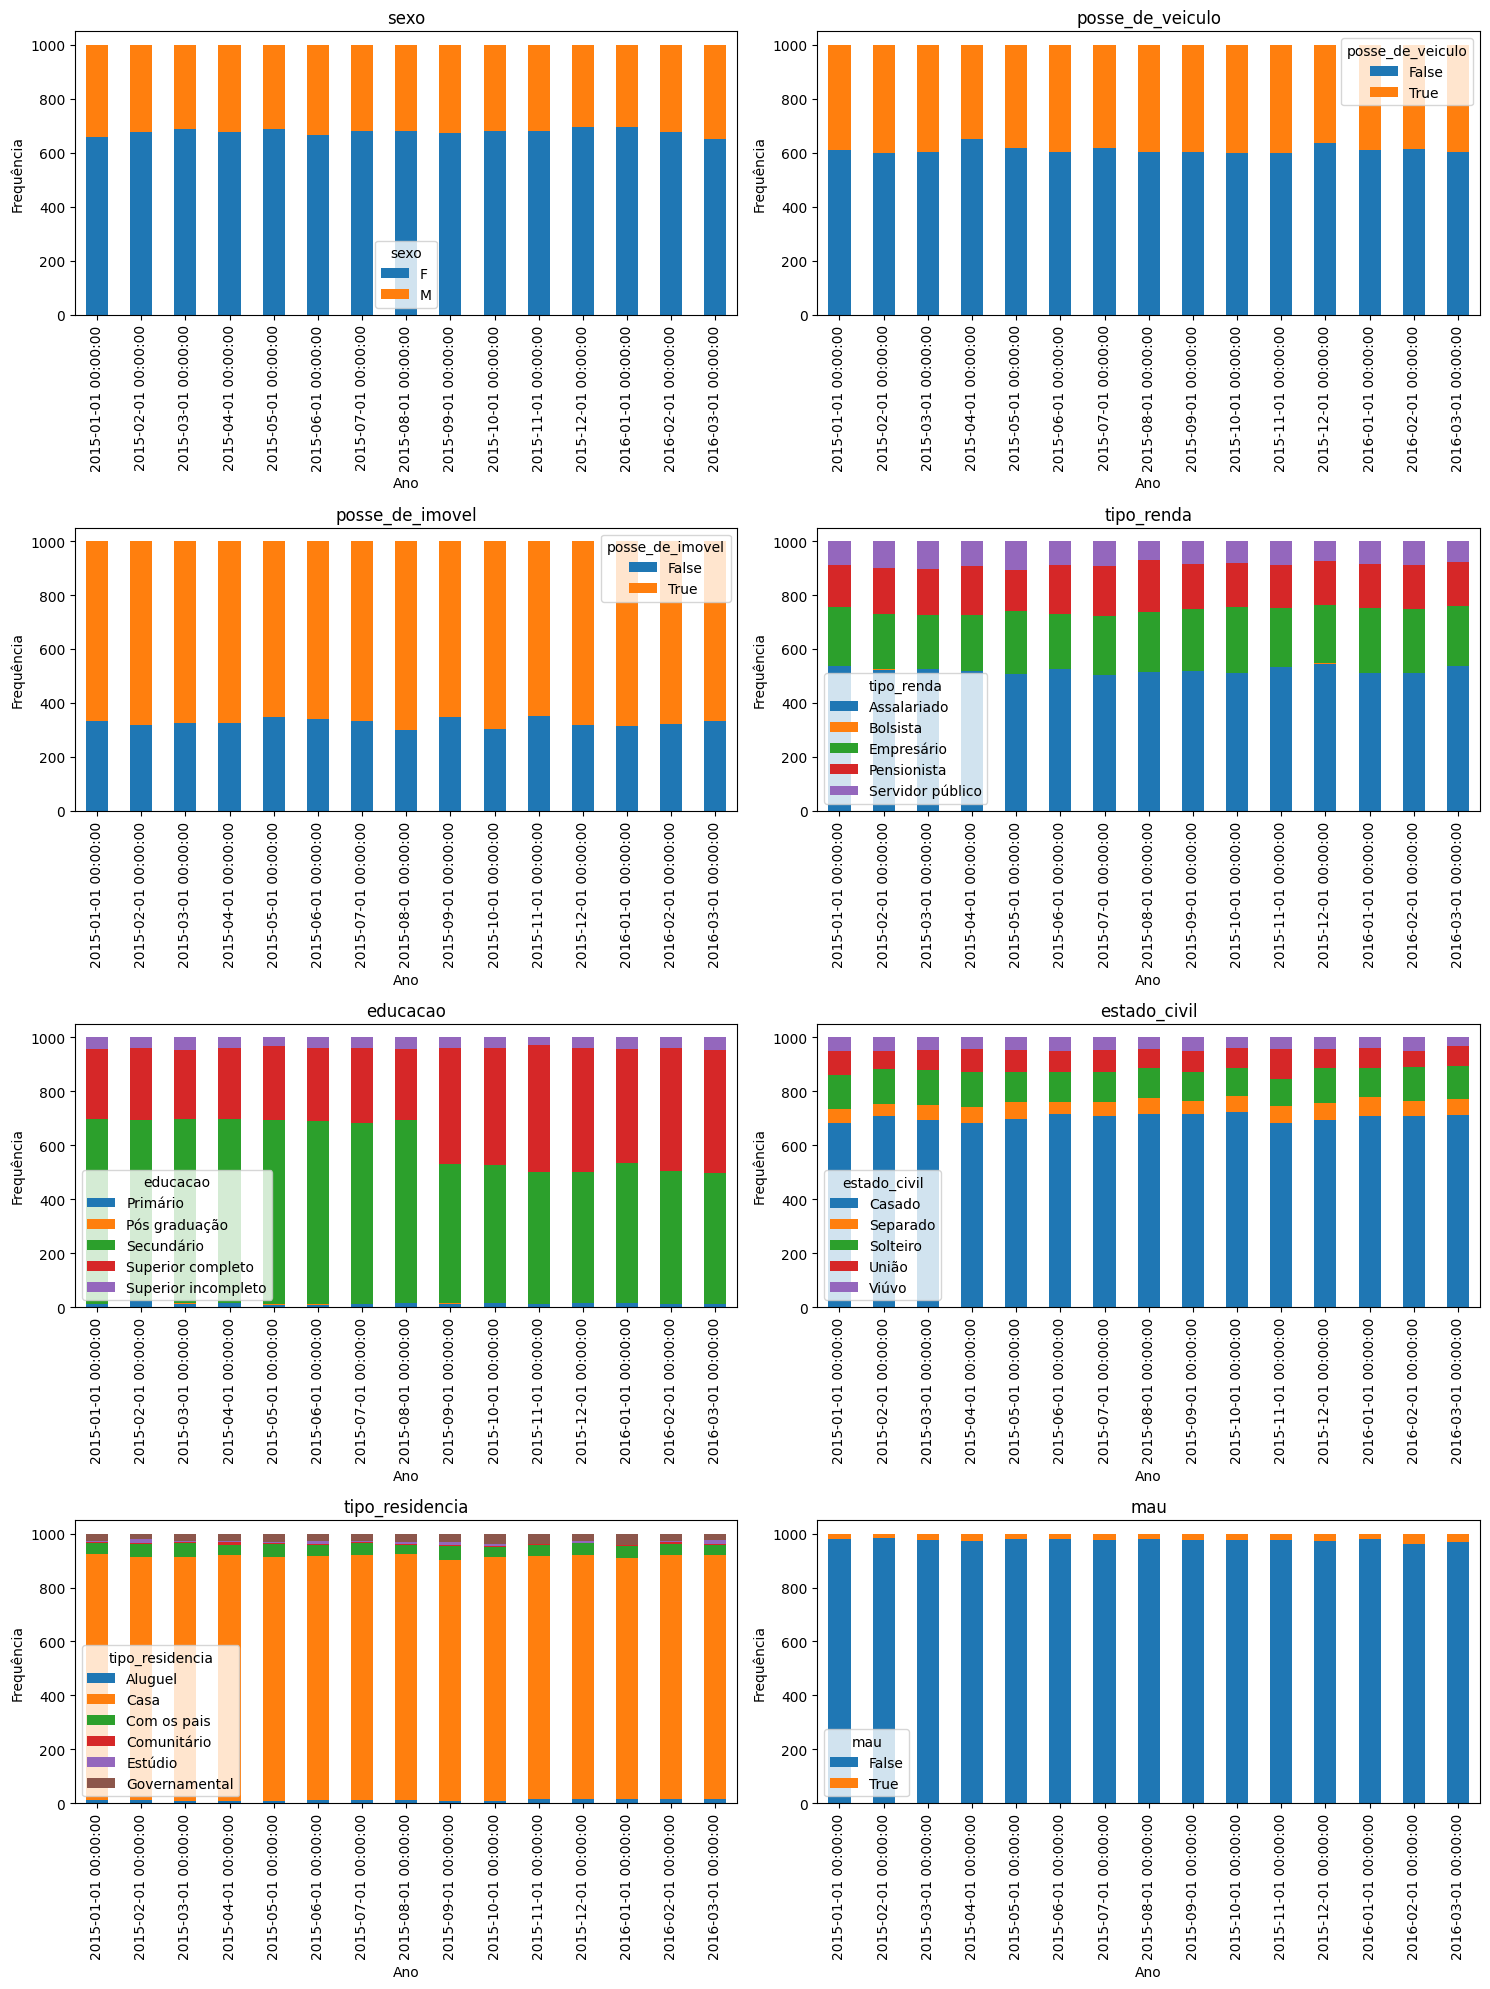

In [ ]:
# 1.1) Variáveis qualitativas
qualitativas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'mau']

# 1.2) Grafico
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, var in enumerate(qualitativas):
    df_grouped = df.groupby(['data_ref', var]).size().unstack().fillna(0)
    df_grouped.plot(kind='bar', stacked=True, ax=axes[i], title=var)
    axes[i].set_xlabel('Ano')
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()


**Insight**

1. Quase todas as variaveis qualitativas se mantiveram igual durante esse periodo de tempo, exceto educação
2. Como visto, o numero de pessoas com superior completo teve um aumento significativo a partir de setembro de 2015, isso pode se dar por alguns motivos:



*   Em alguns locais, o ano letivo acaba em junho e os alunos se formam em agosto/setembro como no caso de paises norte-americanos.
*   Pode ter acontecido algum incentivo governamental para que os alunos continuem estudando.
*   Seria necessario uma amostra maior para poder determinar corretamente o que aconteceu.





2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?



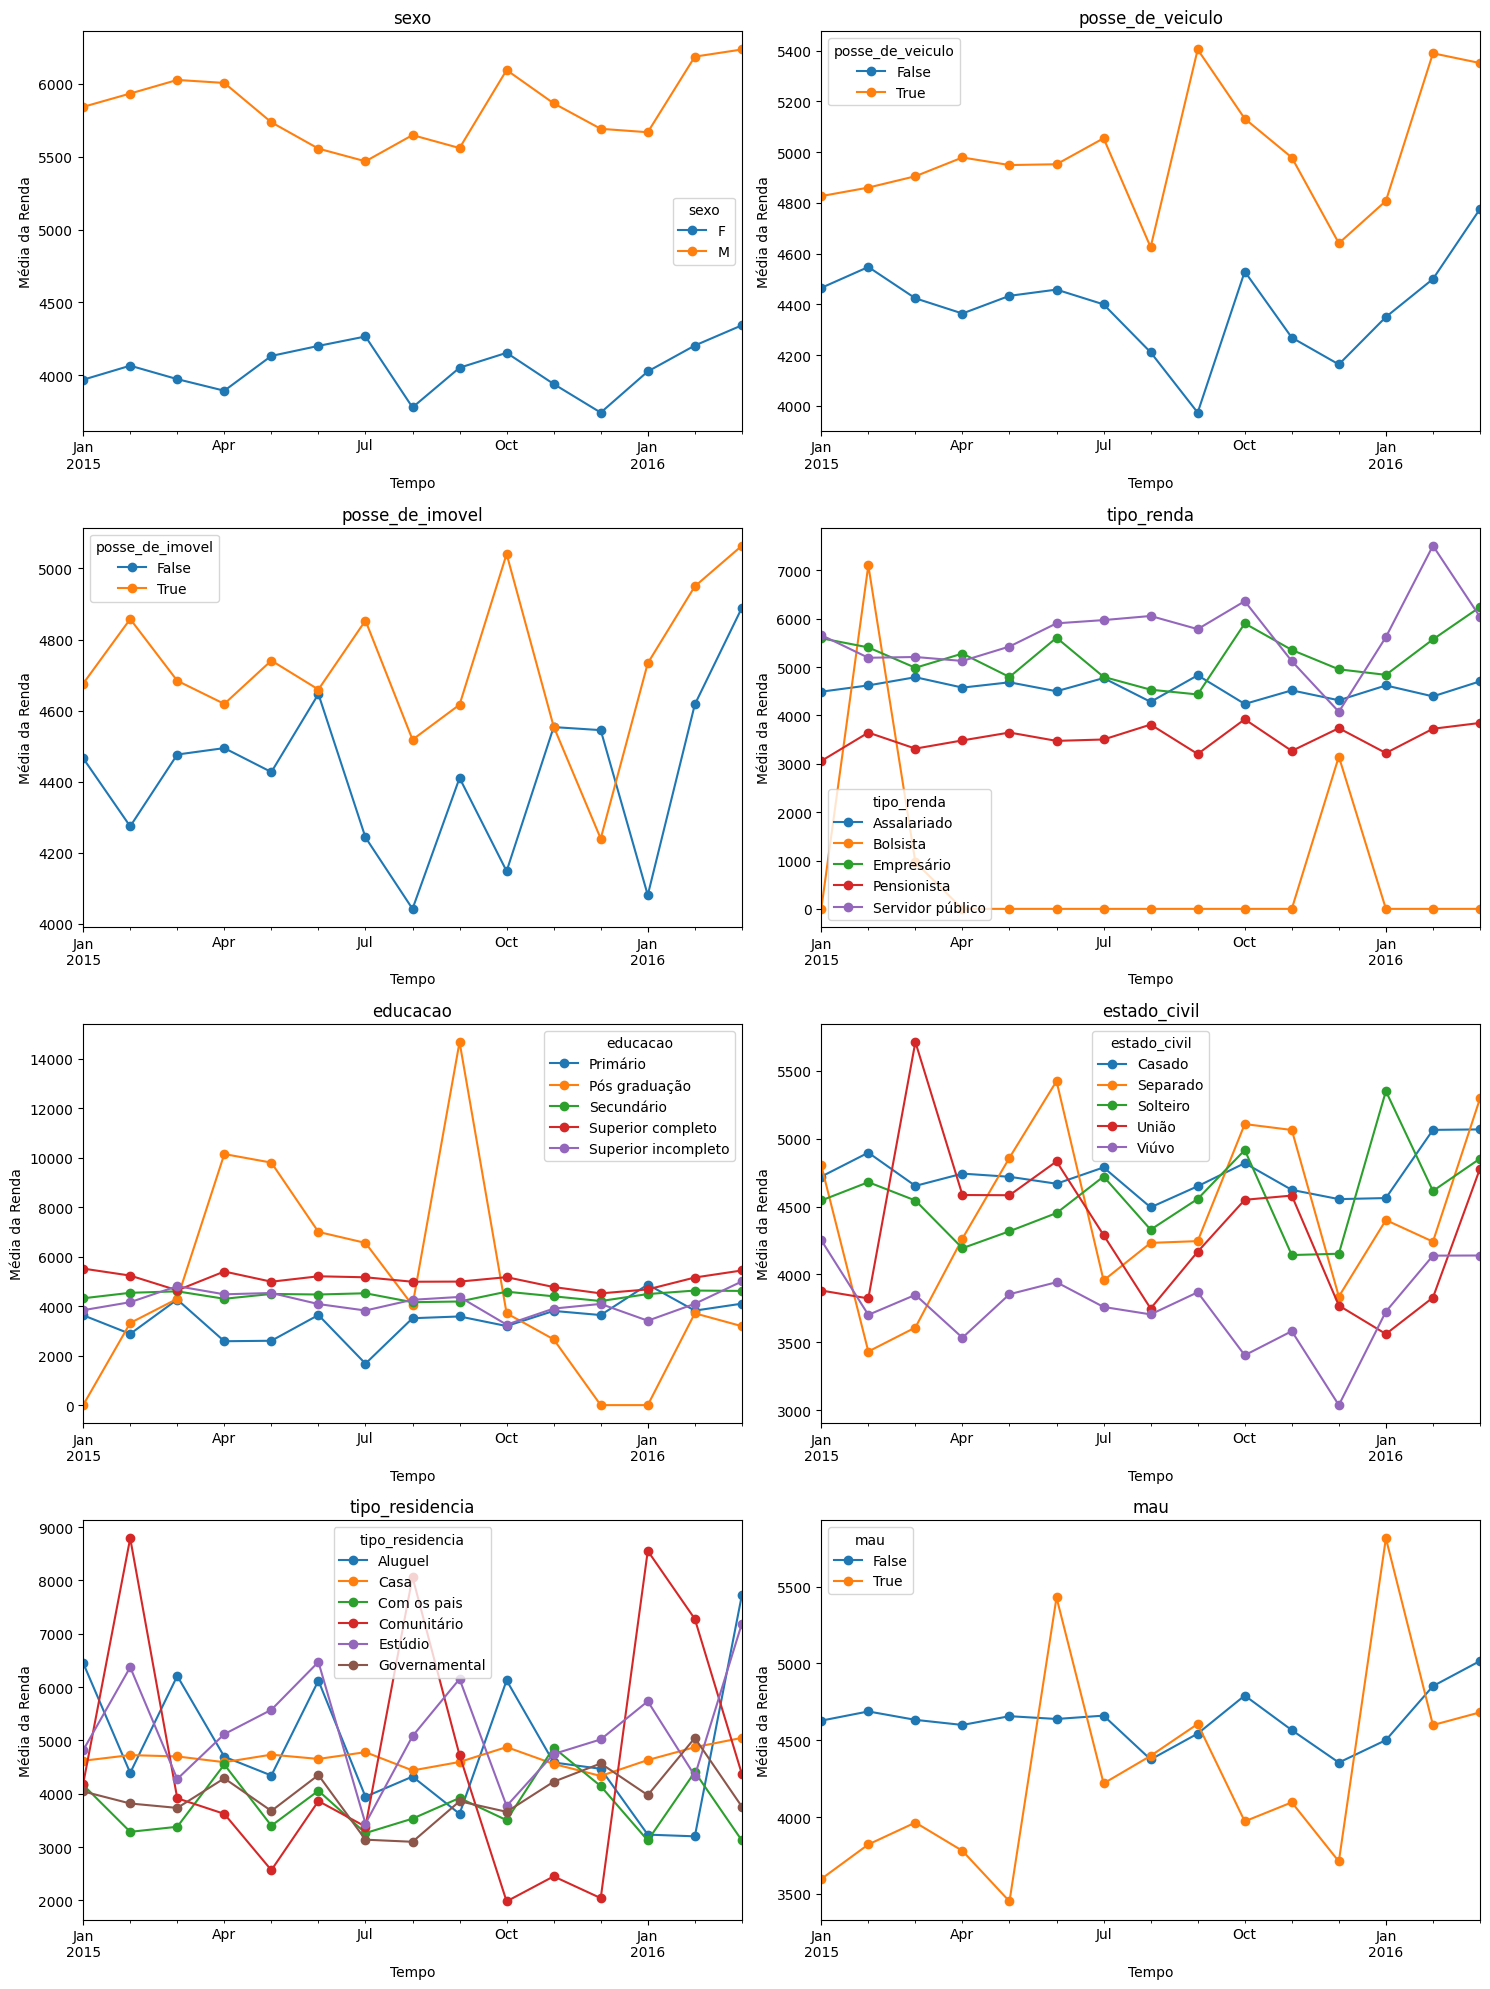

In [ ]:
#2.0)

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, var in enumerate(qualitativas):
    df_grouped = df.groupby(['data_ref', var])['renda'].mean().unstack().fillna(0)
    df_grouped.plot(kind='line', marker='o', ax=axes[i], title=var)
    axes[i].set_xlabel('Tempo')
    axes[i].set_ylabel('Média da Renda')

plt.tight_layout()
plt.show()

**Insights**

* Variaveis como "sexo", "posse de imovel", "posse de veiculo", "estaddo civil" e "tipo residencia" demonstram uma variação repetitiva que daria para ser utilizada no futuro.

* variavel como "mau" possuiram um crescimento consideravel em colaboradores com a caracteristica *True* ao longo do tempo.

* variavel "educação" parece possuir um elemento externo ao que é possuido no *dataframe*, precisando assim de uma maior amostra ou de novos dados.

De forma geral os dados podem sim ser utilizados para modelagem, devendo apenas ter um controle e cuidado com a a variavel que for ser utilizada.